# Titanic Disaster

Not much information is known about the titanic disaster. This not infamous disaster happened on April 15th, 1912 after the ship collided with an iceberg during her journey. In this project we are going to discover the underlying traits fro the features that enable people to survive the crash. Among the people survived there were kids, women, and men. We also discover what genger, age group survived the most and the underlying reasoning behind it. 

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
print('Pandas :\t{}'.format(pd.__version__))
print('numpy :\t\t{}'.format(np.__version__))
print('seaborn : \t{}'.format(sns.__version__))

Pandas :	0.24.1
numpy :		1.16.1
seaborn : 	0.9.0


## Read training and test datasets

In [136]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [137]:
# working copy

train_e = train.copy()
test_e = test.copy()

### Exploratory Data Analysis

In [138]:
train_e.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
684,685,0,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0,NaN,S
695,696,0,2,"Chapman, Mr. Charles Henry",male,52.0,0,0,248731,13.5,NaN,S


In [139]:
test_e.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
279,1171,2,"Oxenham, Mr. Percy Thomas",male,22.0,0,0,W./C. 14260,10.50,NaN,S
117,1009,3,"Sandstrom, Miss. Beatrice Irene",female,1.0,1,1,PP 9549,16.70,G6,S
396,1288,3,"Colbert, Mr. Patrick",male,24.0,0,0,371109,7.25,NaN,Q


Passenger ID doesn't make any sense hence dropping it from further analysis.

In [140]:
# drop passenger id from both training and test dataset
train_e.drop(columns='PassengerId', axis=1, inplace=True)
test_e.drop(columns='PassengerId', axis=1, inplace=True)

Separating out the numerical, categorical, and target features

In [141]:
NUMERICAL_FEATURES =  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']  
CATEGORICAL_FEATURES = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
TARGET = ['Survived']

In [142]:
train_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


#### Missing count and missing percentage

In [143]:
train_missing = pd.DataFrame(train_e.isnull().sum(), columns= ['No. of missing values']).T
train_missing_p = round(train_missing/len(train_e),3) *100
train_missing_p.index = ['Missing Percent']
pd.concat([train_missing,train_missing_p],axis = 0)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
No. of missing values,0.0,0.0,0.0,0.0,177.0,0.0,0.0,0.0,0.0,687.0,2.0
Missing Percent,0.0,0.0,0.0,0.0,19.9,0.0,0.0,0.0,0.0,77.1,0.2


Age has 177 missing records wehreas Cabin has 687 missing records which is significant portion of the dataset. Embarked has only 2 missing values which is not that much. The second row displays the same information in the form of percentage. Cabin has 77% missing records therefore, we can try our best to fill in the missing info. 

In [144]:
pd.DataFrame(train_e[NUMERICAL_FEATURES].describe())

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


#### Findings:

* There are 891 records in the training data set.
* Age has only 714 values out of 891. 
* The range of age was from toddler to 80 year old. 
* Majority of the sample was in Pclass 3.
* There were a few people beyond the age of 38. 
* Majority of the family is a small family only a few family had more than one sibling. 
* Number of parents/children on were mostly 0 only a few family had 6 parents/children. 
* The fare varied form the range of 0 to $513. Most of the people paid less than 31 dollars.
* Out of 13 features in the training dataset. We have 6 integer values, 2 float data types, and 5 string data types

### Univariable analysis

ValueError: Invalid RGBA argument: ['#e64861', 'g']

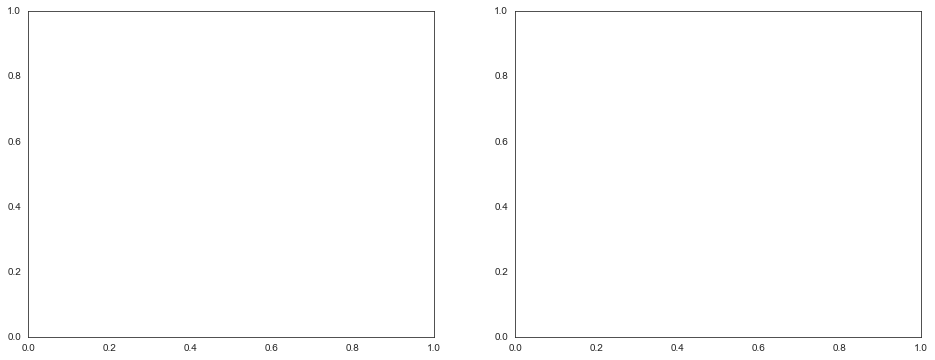

In [147]:
fig, ax = plt.subplots(1,2, figsize=( 16, 6))
sns.countplot(data= train_e, x = 'Survived', ax=ax[0], color = ['#e64861','g']).set_title('Survived By Numbers')
labels = ['Survived', 'Not Survived']
train_e.Survived.value_counts().plot.pie(explode =[0,0.05], autopct='%1.2f%%',shadow=False, startangle=0, 
                                         labels = labels,ax=ax[1], color = ['#e64861','g'])
plt.suptitle('Survived/ Not Survived Detais', fontsize=20, color='r')
ax[1].set_ylabel('')
plt.show()

### Cabin

As seen above in the missing value chart, cabin has a significant portion of the values missing; therofore, we have to find ways to fill in the missing information. One possible technique is to find family members of the people with missing cabin information. It is highly likely that same family members would have the same cabin. 

In [12]:
train_e['FamilyName'] = train_e['Name'].str.split(",",expand=True)[0]
test_e['FamilyName'] = test_e['Name'].str.split(",",expand=True)[0]

In [13]:
cabin_yes = list(train_e[train_e['Cabin'].isnull() == False]['FamilyName'])
cabin_no = list(train_e[train_e['Cabin'].isnull() == True]['FamilyName'])

In [14]:
len(list(set(cabin_no) - set(cabin_yes))) 

509

There are 509 family names who do not have any clue about their cabin allocations. Cabin does not look significant feature; therefore, we plan to continue our analysis without this feature. 

In [15]:
train_e.drop('Cabin', axis=1, inplace=True)
test_e.drop('Cabin', axis=1, inplace=True)

### Embarked

In [16]:
train_e[train_e['Embarked'].isnull() == True]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilyName
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,Icard
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,Stone


There are only two missing records of embarked information, we will allow the same tactic to be followed here to find the family memeber of the missing embarked group. The family members would definitely board from the same port. 

In [17]:
train_e[(train_e['FamilyName'].isin(['Icard','Stone']) == True) & (train_e['Embarked'].isnull() == False)].shape[0]

0

The missing records didn't have any information from their families, therefore, we plan to fill it up with majority class.

In [18]:
train_e['Embarked'].fillna('S',inplace = True)
test_e['Embarked'].fillna('S',inplace = True)

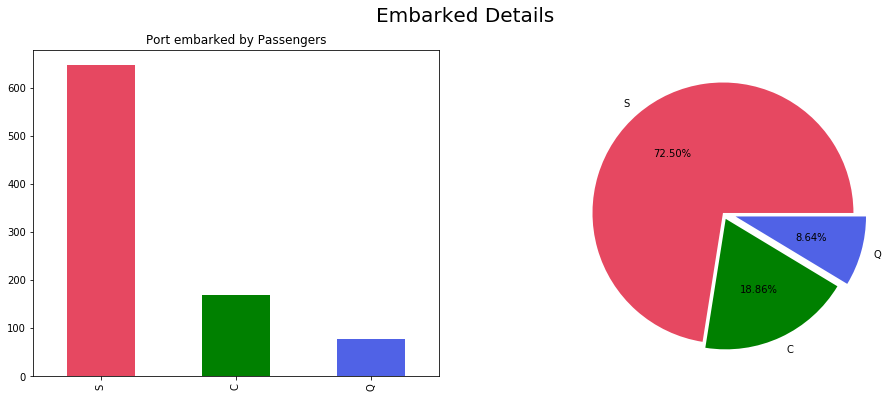

In [19]:
fig, ax = plt.subplots(1,2, figsize=( 16, 6))
train_e.Embarked.value_counts().plot(kind='bar',ax= ax[0], color = ['#e64861','g','#5062e6']).set_title('Port embarked by Passengers')
#labels = ['male', 'female']
train_e.Embarked.value_counts().plot.pie(explode =[0,0.05, 0.10], autopct='%1.2f%%',shadow=False, startangle=0 
                            , ax=ax[1], colors = ['#e64861','g','#5062e6'])
plt.suptitle('Embarked Details', fontsize=20)
ax[1].set_ylabel('')
plt.show()

### Pclass

Pclass didn't have any missing values. Majority of the passengers belonged to Pclass 3.

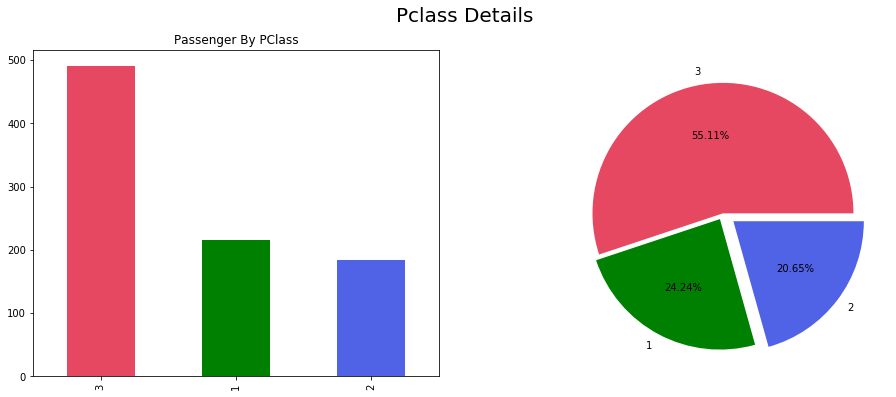

In [20]:
fig, ax = plt.subplots(1,2, figsize=( 16, 6))
#sns.countplot(data= train_e, x = 'Pclass', ax=ax[0]).set_title('Passengers by Pclass')
train_e.Pclass.value_counts().plot(kind='bar',ax= ax[0], color = ['#e64861','g','#5062e6']).set_title('Passenger By PClass')

labels = ['3', '1', '2']
train_e.Pclass.value_counts().plot.pie(explode =[0,0.05, 0.10], autopct='%1.2f%%',shadow=False, startangle=0, 
                                       labels =labels, ax=ax[1], colors = ['#e64861','g','#5062e6'])
plt.suptitle('Pclass Details', fontsize=20)
ax[1].set_ylabel('')
plt.show()

### Gender

The population of the passengers on Titanic was dominated by male majority. Females were almost close to half of the male population

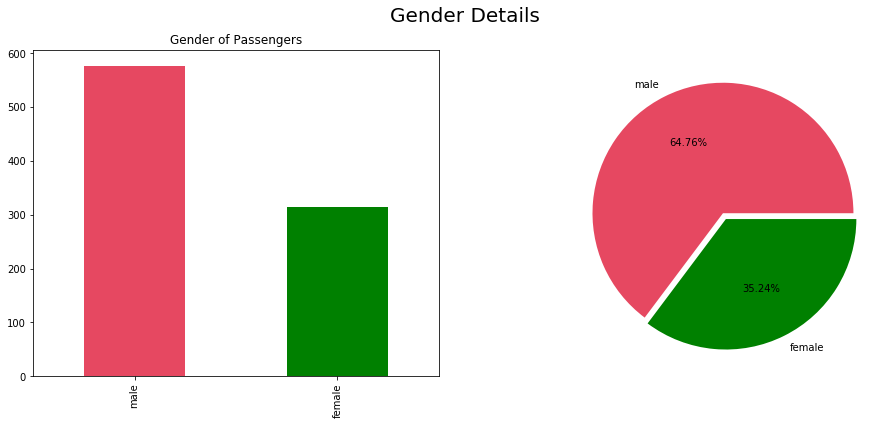

In [21]:
fig, ax = plt.subplots(1,2, figsize=( 16, 6))
train_e.Sex.value_counts().plot(kind='bar',ax= ax[0], color = ['#e64861','g','#5062e6']).set_title('Gender of Passengers')
labels = ['male', 'female']
train_e.Sex.value_counts().plot.pie(explode =[0,0.05], autopct='%1.2f%%',shadow=False, startangle=0, 
                                       labels =labels, ax=ax[1], colors = ['#e64861','g','#5062e6'])
plt.suptitle('Gender Details', fontsize=20)
ax[1].set_ylabel('')
plt.show()

### Family or alone?

We have two features SibSp and Parch, we plan to combine those two features into one for the sake of simplicity and use the binary values as the result. 1 indicates that person does have family on board and 0 inidcates that passenger is alone on the ship.

In [22]:
train_e['family'] = train_e['SibSp'] + train_e['Parch']
test_e['family'] = test_e['SibSp'] + test_e['Parch']
train_e['family'] = train_e.apply(
    lambda row: 1 if (row['family'] > 0 ) else 0, axis = 1)
test_e['family'] = test_e.apply(
    lambda row: 1 if (row['family'] > 0 ) else 0, axis = 1)

train_SibSp = train_e.pop('SibSp')
train_Parch = train_e.pop('Parch')
test_SibSp = test_e.pop('SibSp')
test_Parch = test_e.pop('Parch')


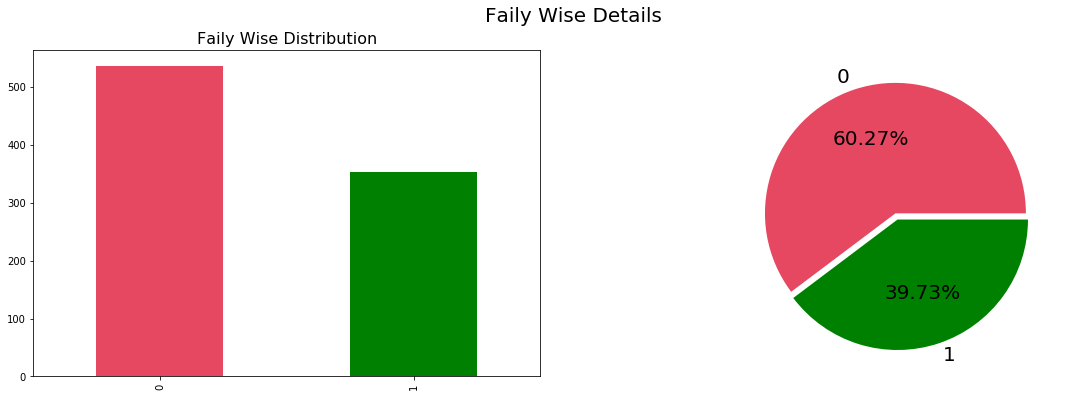

In [23]:
fig, ax = plt.subplots(1,2, figsize=( 20, 6))
train_e.family.value_counts().plot(kind='bar',ax= ax[0], color = ['#e64861','g','#5062e6']).set_title('Faily Wise Distribution',fontsize=16)
#labels = ['male', 'female']
train_e.family.value_counts().plot.pie(explode =[0,0.05], autopct='%1.2f%%',shadow=False, startangle=0, 
                                        ax=ax[1], colors = ['#e64861','g','#5062e6'],fontsize = 20)
plt.suptitle('Faily Wise Details', fontsize=20)
ax[1].set_ylabel('')
plt.show()

### Merging the titles

Title prior to feature engineering

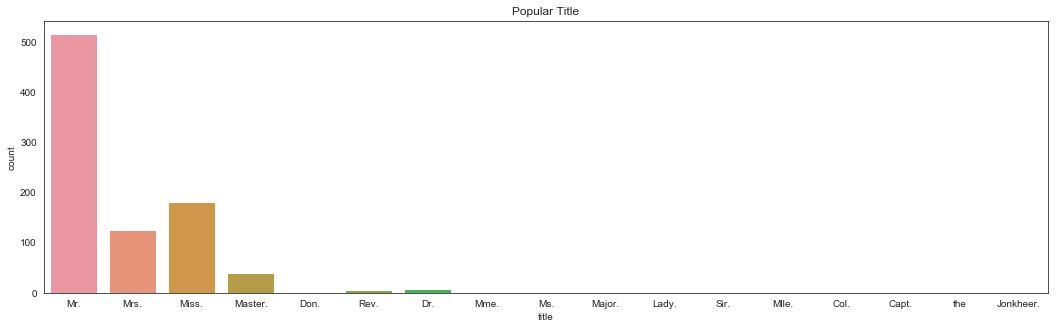

In [24]:
train_e['title'] = train_e['Name'].str.split(",",expand=True)[1].str.split(" ",expand=True)[1]
test_e['title'] = test['Name'].str.split(",",expand=True)[1].str.split(" ",expand=True)[1] 

plt.figure(figsize=(18,5))
sns.set_style("white")
g =sns.countplot(data = train_e, x = "title")
g.set_title('Popular Title')
plt.show()

In [25]:
test_e.loc[test_e['title'].isin(['Capt.','Dr.','Rev.','Major.','Col.','the','Don.', 'Jonkheer.', 'Sir.', 'Lady.']), 'title'] = 'Spl.Prof'
train_e.loc[train_e['title'].isin(['Capt.','Dr.','Rev.','Major.','Col.','the','Don.', 'Jonkheer.', 'Sir.', 'Lady.']), 'title'] = 'Spl.Prof'
train_e.loc[train_e['title'].isin(['Ms.','Mlle.']), 'title'] = 'Miss.'
train_e.loc[train_e['title'].isin(['Mme.']), 'title'] = 'Mrs.'
test_e.loc[test_e['title'].isin(['Ms.','Mlle.']), 'title'] = 'Miss.'
test_e.loc[test_e['title'].isin(['Mme.']), 'title'] = 'Mrs.'

### Titles after Data Engineering, grouping similar titles

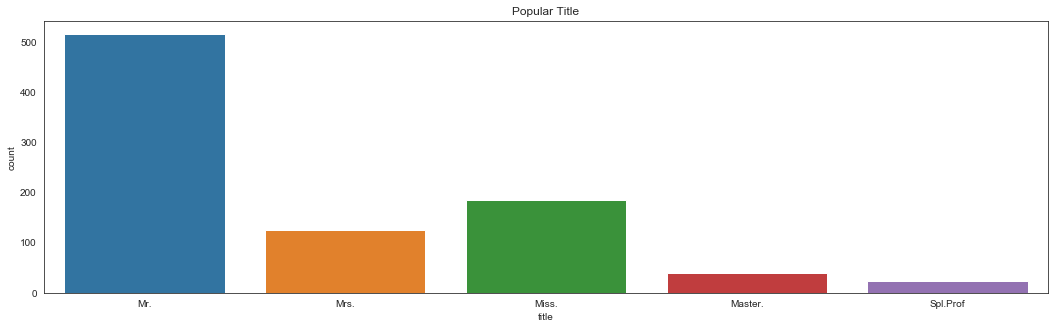

In [26]:
plt.figure(figsize=(18,5))
sns.set_style("white")
g =sns.countplot(data = train_e, x = "title")
g.set_title('Popular Title')
plt.show()

### Age

In [27]:
# Finding in the mean age by titles
mr_mean_age = round(train_e[((train_e.title == 'Mr.') & ( train_e.Age != np.nan))]['Age'].mean())
miss_mean_age = round(train_e[((train_e.title == 'Miss.') & ( train_e.Age != np.nan))]['Age'].mean())
mrs_mean_age = round(train_e[((train_e.title == 'Mrs.') & ( train_e.Age != np.nan))]['Age'].mean())
master_mean_age = round(train_e[((train_e.title == 'Master.') & ( train_e.Age != np.nan))]['Age'].mean())
spl_mean_age = round(train_e[((train_e.title == 'Spl.Prof') & ( train_e.Age != np.nan))]['Age'].mean())

#Filling the training dataset with missing age values for similar titles
train_e['Age'] = train_e.apply(
    lambda row: mr_mean_age if ((np.isnan(row['Age'])) & (row['title'] == 'Mr.')) else row['Age'], axis = 1)
train_e['Age'] = train_e.apply(
    lambda row: mrs_mean_age if ((np.isnan(row['Age'])) & (row['title'] == 'Mrs.')) else row['Age'], axis = 1)
train_e['Age'] = train_e.apply(
    lambda row: miss_mean_age if ((np.isnan(row['Age'])) & (row['title'] == 'Miss.')) else row['Age'], axis = 1)
train_e['Age'] = train_e.apply(
    lambda row: master_mean_age if ((np.isnan(row['Age'])) & (row['title'] == 'Master.')) else row['Age'], axis = 1)
train_e['Age'] = train_e.apply(
    lambda row: spl_mean_age if ((np.isnan(row['Age'])) & (row['title'] == 'Spl.Prof')) else row['Age'], axis = 1)

#Filling the test dataset with missing age values for similar titles
test_e['Age'] = test_e.apply(
    lambda row: mr_mean_age if ((np.isnan(row['Age'])) & (row['title'] == 'Mr.')) else row['Age'], axis = 1)
test_e['Age'] = test_e.apply(
    lambda row: mrs_mean_age if ((np.isnan(row['Age'])) & (row['title'] == 'Mrs.')) else row['Age'], axis = 1)
test_e['Age'] = test_e.apply(
    lambda row: miss_mean_age if ((np.isnan(row['Age'])) & (row['title'] == 'Miss.')) else row['Age'], axis = 1)
test_e['Age'] = test_e.apply(
    lambda row: master_mean_age if ((np.isnan(row['Age'])) & (row['title'] == 'Master.')) else row['Age'], axis = 1)


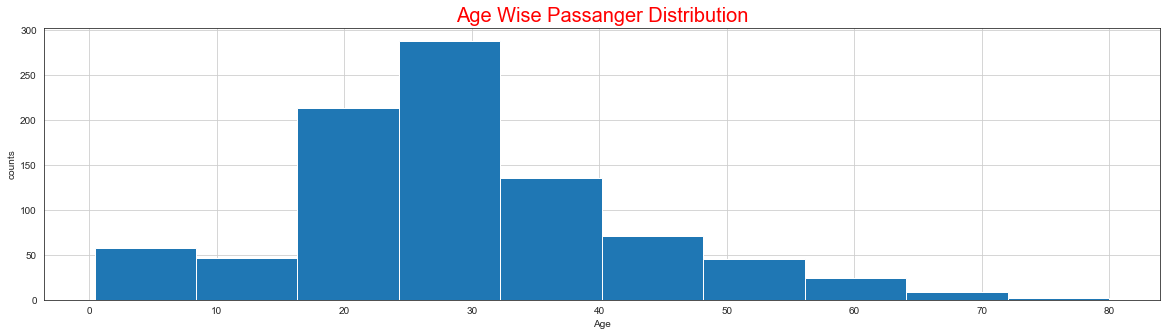

In [28]:
plt.figure(figsize=(20,5))
train_e['Age'].hist()
plt.xlabel('Age')
plt.ylabel('counts')
plt.title('Age Wise Passanger Distribution', fontsize = 20, color='r')
plt.show()

In [29]:
s = pd.Series(np.array([0, 5, 12, 18, 21, 30, 40, 50, 60, 70, 80]),
    index=['toddler','toddler','Young', 'Teen', 'Adult', '30s','40s','50s','60s','70s','80s'])
train_e['Age_Bucket'] = pd.cut(train_e['Age'],s)
test_e['Age_Bucket'] = pd.cut(test_e['Age'],s)

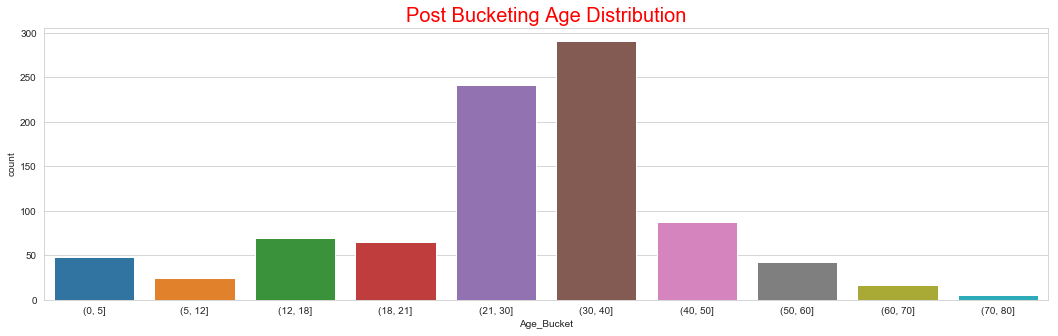

In [30]:
plt.figure(figsize=(18,5))
sns.set_style("whitegrid")
g =sns.countplot(data = train_e, x = "Age_Bucket")
g.set_title('Post Bucketing Age Distribution', fontsize = 20, color='r')
plt.show()

### Fare

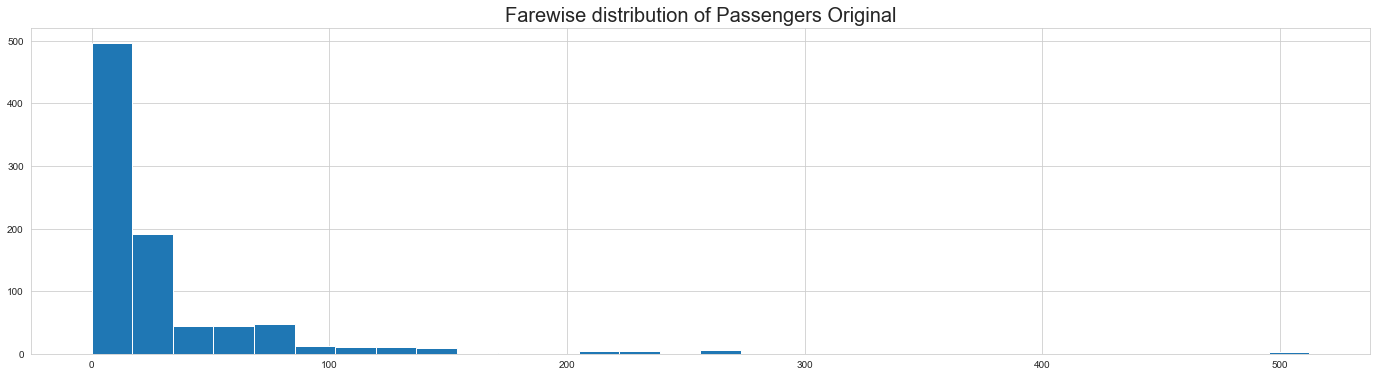

In [31]:
fig = plt.figure(figsize = (24,6))
plt.hist(train_e['Fare'], bins =30 )
plt.title('Farewise distribution of Passengers Original', fontsize= 20)
plt.show()

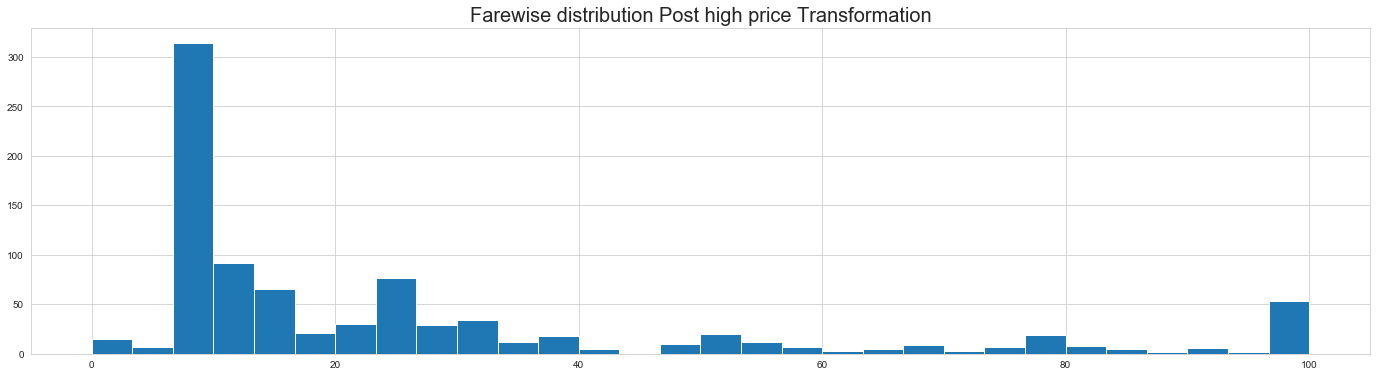

In [32]:
train_e['Fare'] = train_e.apply(
    lambda row: 100 if (row['Fare']> 99 ) else row['Fare'], axis = 1)
fig = plt.figure(figsize = (24,6))
plt.hist(train_e['Fare'], bins =30 )
plt.title('Farewise distribution Post high price Transformation', fontsize=20)
plt.show()

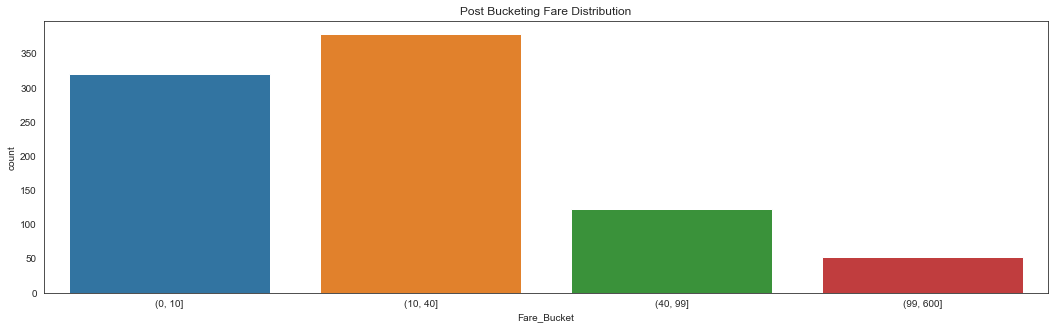

In [33]:
s = pd.Series(np.array([0, 10, 40, 99, 600, ]),
    index=['low','medium', 'high', 'executive',''])

train_e['Fare_Bucket'] = pd.cut(train_e['Fare'],s)
plt.figure(figsize=(18,5))
sns.set_style("white")
g =sns.countplot(data = train_e, x = "Fare_Bucket")
g.set_title('Post Bucketing Fare Distribution')
plt.show()

### Bi-Variate Analysis

##### Embarked Wise Survivals

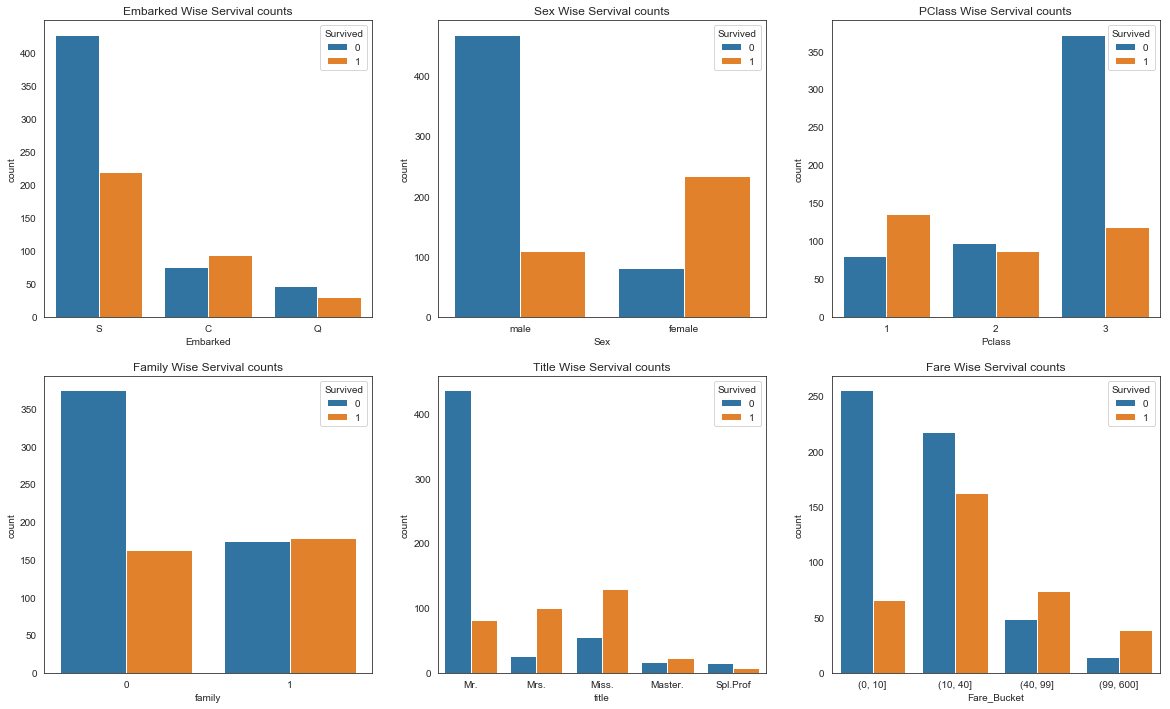

In [34]:
fig, ax = plt.subplots(2,3, figsize=( 20, 12))
sns.countplot(data= train_e, x = "Embarked", hue= 'Survived',ax=ax[0][0]).set_title('Embarked Wise Servival counts')
sns.countplot(data= train_e, x = "Sex", hue= 'Survived',ax=ax[0][1]).set_title('Sex Wise Servival counts')
sns.countplot(data= train_e, x = "Pclass", hue= 'Survived',ax=ax[0][2]).set_title('PClass Wise Servival counts')
sns.countplot(data= train_e, x = "family", hue= 'Survived',ax=ax[1][0]).set_title('Family Wise Servival counts')
sns.countplot(data= train_e, x = "title", hue= 'Survived',ax=ax[1][1]).set_title('Title Wise Servival counts')
sns.countplot(data= train_e, x = "Fare_Bucket", hue= 'Survived',ax=ax[1][2]).set_title('Fare Wise Servival counts')
plt.show()

##### Gender Wise Survival 

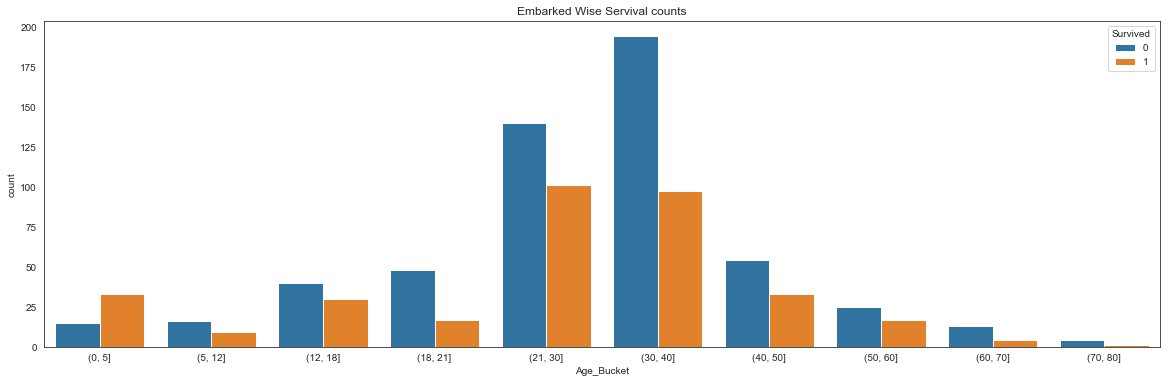

In [35]:
plt.figure(figsize=( 20, 6))
sns.countplot(data= train_e, x = "Age_Bucket", hue= 'Survived').set_title('Embarked Wise Servival counts')
plt.show()

In [36]:
drop_features = ['Name','Age','Ticket','Fare','FamilyName']
train_e.drop(drop_features, axis= 1, inplace=True)

In [37]:
#train_e.info()
def encoding(df):
    df = pd.concat([df, pd.get_dummies(df['Pclass'], prefix='Pclass',drop_first=True)],axis = 1)
    df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked',drop_first=True)],axis = 1)
    df = pd.concat([df, pd.get_dummies(df['title'], prefix='title',drop_first=True)],axis = 1)
    df = pd.concat([df, pd.get_dummies(df['Age_Bucket'], prefix='Age_Bucket',drop_first=True)],axis = 1)
    df = pd.concat([df, pd.get_dummies(df['Sex'], prefix='Sex',drop_first=True)],axis = 1)
    df = pd.concat([df, pd.get_dummies(df['Fare_Bucket'], prefix='Fare',drop_first=True)],axis = 1)
    drop_features_2 = ['Pclass','Embarked','title','Age_Bucket','Sex','Fare_Bucket']
    return df.drop(drop_features_2, axis = 1)


train_e = encoding(train_e)

In [52]:
# y = train_e.pop('Survived')
# X = train_e
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

In [61]:
def model_summary(model_obj, model_name):
    model_obj.fit(X_train, y_train)
    print('-'*40)
    print('Model : {}'.format(model_name))
    print('-'*40)
    print('Traing dataset score: {}'.format(model_obj.score(X_train, y_train)))
    model_pred = model_obj.predict(X_test)
    print('Test Data Metrics')
    print ('Accuracy Score :\t{:.4}'.format(accuracy_score(y_test,model_pred)))
    print ('Recall Score :\t\t{:.4}'.format(recall_score(y_test,model_pred)))
    print ('Precision Score :\t{:.4}'.format(precision_score(y_test,model_pred)))
    print ('AUC Score :\t{:.4}'.format(roc_auc_score(y_test,model_pred)))
    print(confusion_matrix(y_test, model_pred))
    print('Mean CV accuracy :{}'.format(cross_val_score(model_obj, X, y, cv=5).mean())) 

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, auc,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

logit = LogisticRegression(solver='newton-cg', random_state=42)
rf = RandomForestClassifier(n_estimators=30, random_state=42)
linear_svc = SVC(kernel='linear')
# rbf_svc = SVC(kernel='rbf')
# poly_svc = SVC(kernel='poly')
gvc = GradientBoostingClassifier(random_state=42)
sgc = SGDClassifier(random_state = 42)
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
nb = GaussianNB()
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15, 2), random_state=1)

model_summary(logit, 'LogisticRegression')
model_summary(rf, 'Random Forest')
model_summary(linear_svc, 'Linear SVM')
# model_summary(rbf_svc, 'Radial SVM')
# model_summary(poly_svc, 'Ploynominal SVM')
model_summary(gvc, 'GradientBoostingClassifier')
model_summary(sgc, 'SGDC')
model_summary(nb, 'NB')
model_summary(dt, 'DT')
model_summary(knn, 'KNN')
model_summary(clf, 'NN')


----------------------------------------
Model : LogisticRegression
----------------------------------------
Traing dataset score: 0.8117977528089888
Test Data Metrics
Accuracy Score :	0.7933
Recall Score :		0.7213
Precision Score :	0.6875
AUC Score :	0.7759
[[98 20]
 [17 44]]
Mean CV accuracy :0.8035755892200369
----------------------------------------
Model : Random Forest
----------------------------------------
Traing dataset score: 0.8834269662921348
Test Data Metrics
Accuracy Score :	0.8045
Recall Score :		0.7377
Precision Score :	0.7031
AUC Score :	0.7883
[[99 19]
 [16 45]]
Mean CV accuracy :0.7834953136531235
----------------------------------------
Model : Linear SVM
----------------------------------------
Traing dataset score: 0.8033707865168539
Test Data Metrics
Accuracy Score :	0.7709
Recall Score :		0.7049
Precision Score :	0.6515
AUC Score :	0.755
[[95 23]
 [18 43]]
Mean CV accuracy :0.7968402223288497
----------------------------------------
Model : GradientBoostingClas

In [78]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [123]:
feature_imp = pd.DataFrame(X_train.columns.values)
feature_imp.columns = ['feature']
feature_imp['importance']  = rf.feature_importances_
feature_imp.index = feature_imp.feature

<Figure size 1440x1440 with 0 Axes>

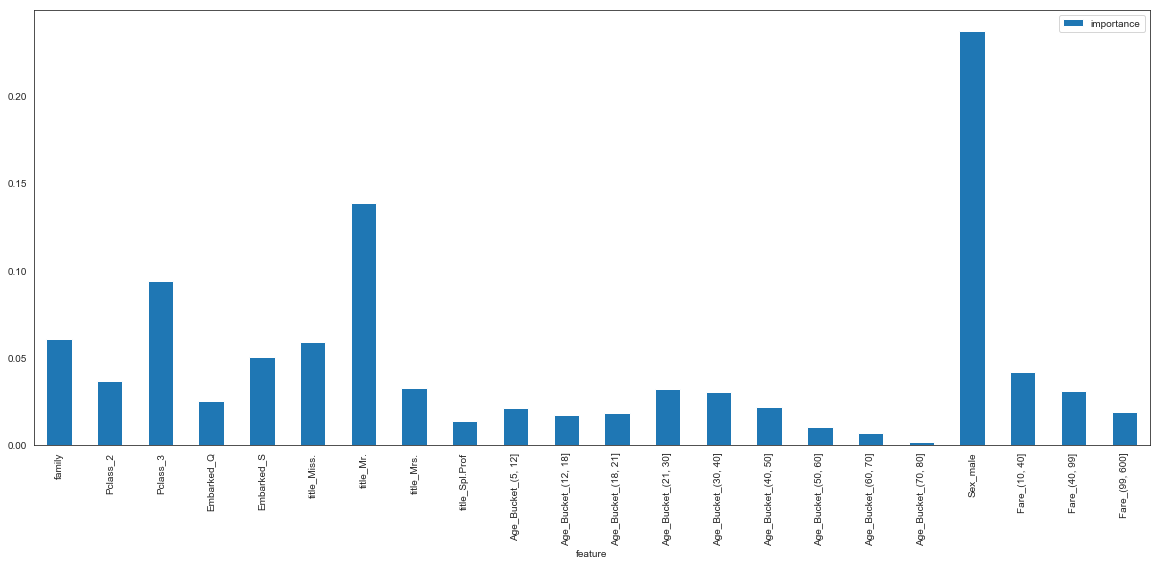

In [134]:
plt.figure(figsize=( 20, 20))
feature_imp.plot(kind='bar',figsize=(20,8));
plt.show();